In [51]:
import matplotlib.pyplot as plt
import numpy as np

In [111]:
dataset, param, param_ful = "apex", "wd", "Weight Decay"
col = {"wd":0}
file_path = f"./trans_mod_{dataset}/log1.csv"

In [112]:
with open(file_path, "r") as file:
    data = file.read().split("\n")[9:-1]
data = [data[i].split(',') for i in range(len(data))]
for i, d in enumerate(data):
    data[i] = [d[1].split(':')[1], d[3].split(':')[1], d[4].split(':')[1]]
for i, d in enumerate(data):
    data[i] = [x for x in map(float, d)]
data = np.asarray(data)
print(data)

[[1.000e-05 1.474e-01 2.523e-01]
 [2.000e-05 1.265e-01 2.247e-01]
 [3.000e-05 1.536e-01 2.114e-01]
 [4.000e-05 9.840e-02 1.432e-01]
 [5.000e-05 1.194e-01 1.185e-01]
 [6.000e-05 1.064e-01 1.269e-01]
 [7.000e-05 1.458e-01 1.469e-01]
 [8.000e-05 1.359e-01 1.461e-01]
 [9.000e-05 1.200e-01 1.263e-01]]


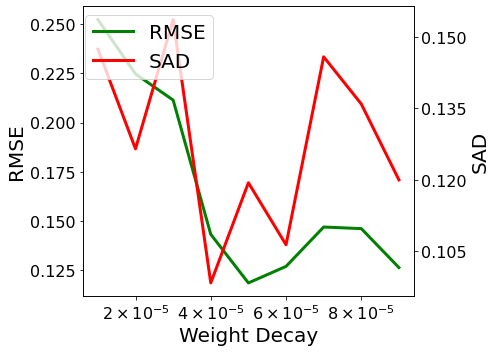

In [113]:
fig, axes = plt.subplots(figsize=(7, 5))
fig.patch.set_facecolor('white')

axes.set_xlabel(param_ful, fontsize=20)
axes.set_ylabel("RMSE", fontsize=20)
axes.tick_params(labelsize=16)
axes_left = axes.twinx()
axes_left.set_ylabel("SAD", fontsize=20)
axes_left.tick_params(labelsize=16)

axes.plot(data[:, col[param]], data[:, 2], color="green", lw=3, label="RMSE")
axes_left.plot(data[:, col[param]], data[:, 1], color="red", lw=3, label="SAD")

# axes.set_xscale('log')
# axes_left.set_xscale('log')
# axes.ticklabel_format(style="plain")
axes.set_xticks([2e-5, 4e-5, 6e-5, 8e-5])
axes.set_xticklabels([r"$2\times10^{-5}$", r"$4\times10^{-5}$", r"$6\times10^{-5}$", r"$8\times10^{-5}$"])
axes.yaxis.set_major_locator(plt.MaxNLocator(6))
axes_left.yaxis.set_major_locator(plt.MaxNLocator(6))

fig.legend(fontsize=20, loc='lower right', bbox_to_anchor=(0.45, 0.74))
fig.set_tight_layout({"pad":1, "h_pad":0.0, "w_pad":0.0, "rect":(0,0,1,1)})    
fig.savefig(f"./Abalation/{dataset}_{param}.pdf")

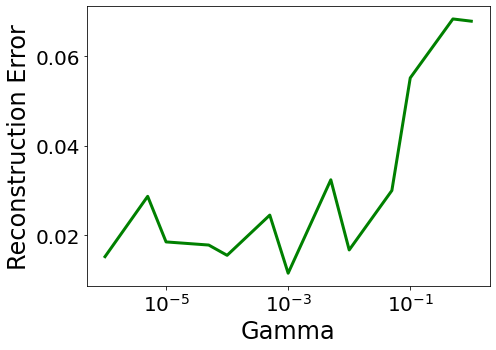

In [49]:
fig, axes = plt.subplots(figsize=(7, 5))
fig.patch.set_facecolor('white')

axes.set_xlabel(param_ful, fontsize=24)
axes.set_xscale('log')
axes.set_ylabel("Reconstruction Error", fontsize=24)
axes.tick_params(labelsize=20)

axes.plot(data[:, col[param]], data[:, 1], color="green", lw=3)
fig.set_tight_layout({"pad":1, "h_pad":0.0, "w_pad":0.0, "rect":(0,0,1,1)})    
fig.savefig(f"./Abalation/{dataset}_{param}.pdf")